/Users/ryan.gorzek/opt/anaconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/ryan.gorzek/opt/anaconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/ryan.gorzek/opt/anaconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/ryan.gorzek/opt/anaconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


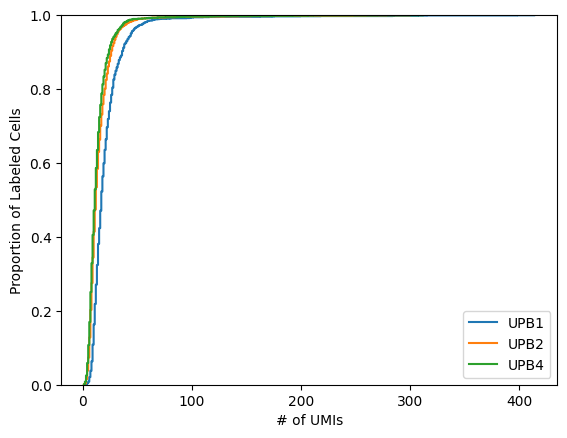

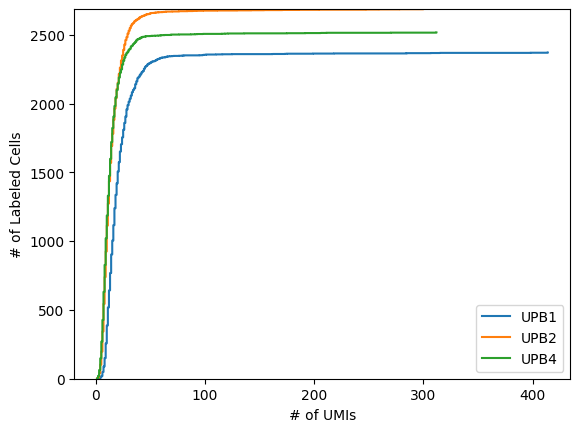

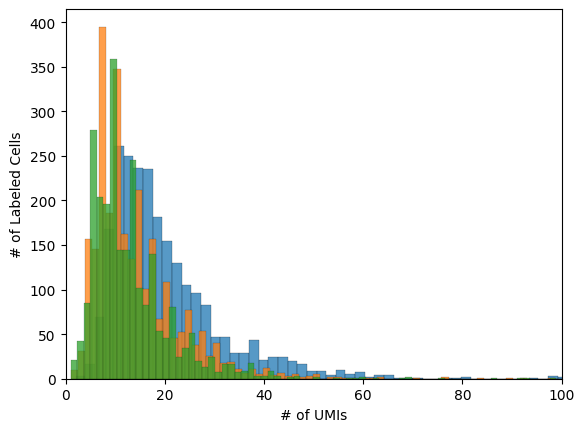

In [38]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import anndata as ad

upbs = ["UPB1", "UPB2", "UPB4"] # , "WPRE", "tdTomato"
adatas = []

for upb in upbs:
    temp_adata = sc.read_10x_h5("/Users/ryan.gorzek/Library/CloudStorage/GoogleDrive-ryan.gorzek@gmail.com/Shared drives/Projection-seq/output/UPB_Spike/{0}_BC1/filtered_feature_bc_matrix.h5".format(upb))
    # genes = [g for g in temp_adata.var_names if g not in ["GCaMP"]]
    adatas.append(temp_adata)

adata = ad.concat(adatas, join="outer", axis=1)

for g in upbs:
    adata.obs.loc[:, g] = adata[:, g].X.toarray().astype(int)

fig, ax = plt.subplots()

for upb in upbs:
    upbs_mask = np.array(adata.obs[upb]) > 0
    adata_upb = adata[upbs_mask, :]
    sns.ecdfplot(data=np.array(adata_upb.obs[upb]))
ax.grid(False)
ax.set_xlabel("# of UMIs")
ax.set_ylabel("Proportion of Labeled Cells")
ax.legend(upbs, loc="lower right")
plt.show(block=False)

fig, ax = plt.subplots()

for upb in upbs:
    upbs_mask = np.array(adata.obs[upb]) > 0
    adata_upb = adata[upbs_mask, :]
    sns.ecdfplot(data=np.array(adata_upb.obs[upb]), stat="count")
ax.grid(False)
ax.set_xlabel("# of UMIs")
ax.set_ylabel("# of Labeled Cells")
ax.legend(upbs, loc="lower right")
plt.show(block=False)

fig, ax = plt.subplots()

for upb in upbs:
    upbs_mask = np.array(adata.obs[upb]) > 0
    adata_upb = adata[upbs_mask, :]
    sns.histplot(data=np.array(adata_upb.obs[upb]), legend=True)
ax.grid(False)
ax.set_xlabel("# of UMIs")
ax.set_xlim((0, 100))
ax.set_ylabel("# of Labeled Cells")
plt.show(block=False)